# Estimating effect of multiple treatments

In [1]:
from dowhy import CausalModel
import dowhy.datasets

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = dowhy.datasets.linear_dataset(10, num_common_causes=4, num_samples=10000,
                                     num_instruments=0, num_effect_modifiers=2,
                                     num_treatments=2,
                                     treatment_is_binary=False,
                                     num_discrete_common_causes=2,
                                     num_discrete_effect_modifiers=0,
                                     one_hot_encode=False)
df=data['df']
df.head()

X0        X1        W0        W1 W2 W3         v0         v1  \
0 -1.947532 -0.143575 -2.940761  0.704417  0  3  12.615346 -10.967185   
1  0.219675  0.799437 -1.001001 -0.267116  1  0   1.063260  -1.713651   
2 -0.674332 -0.715546 -1.210202  2.808832  3  1  21.176604   3.769456   
3 -1.699811 -1.295508 -0.719221  1.067491  0  1   8.191641  -4.385406   
4  0.401843 -1.189490 -1.047737  0.839477  2  0  10.354018   0.019731   

             y  
0  1061.216087  
1   -14.117716  
2  -189.314365  
3   482.126100  
4   113.643012

In [3]:
model = CausalModel(data=data["df"], 
                    treatment=data["treatment_name"], outcome=data["outcome_name"], 
                    graph=data["gml_graph"])

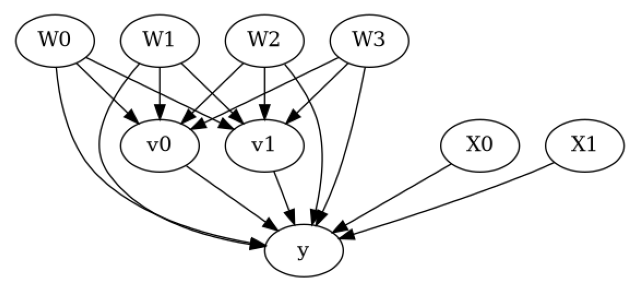

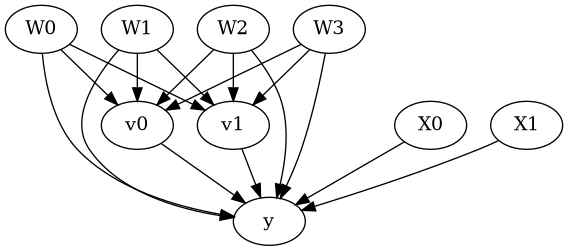

In [4]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [5]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
─────────(E[y|W3,W0,W1,W2])
d[v₀  v₁]                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W3,W0,W1,W2,U) = P(y|v0,v1,W3,W0,W1,W2)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## Linear model

Let us first see an example for a linear model. The control_value and treatment_value can be provided as a tuple/list when the treatment is multi-dimensional.

The interpretation is change in y when v0 and v1 are changed from (0,0) to (1,1).

In [6]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                        control_value=(0,0),
                                        treatment_value=(1,1),
                                        method_params={'need_conditional_estimates': False})
print(linear_estimate) 

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
─────────(E[y|W3,W0,W1,W2])
d[v₀  v₁]                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W3,W0,W1,W2,U) = P(y|v0,v1,W3,W0,W1,W2)

## Realized estimand
b: y~v0+v1+W3+W0+W1+W2+v0*X0+v0*X1+v1*X0+v1*X1
Target units: ate

## Estimate
Mean value: -24.80072189007089



You can estimate conditional effects, based on effect modifiers. 

In [7]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                        control_value=(0,0),
                                        treatment_value=(1,1))
print(linear_estimate) 

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
─────────(E[y|W3,W0,W1,W2])
d[v₀  v₁]                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W3,W0,W1,W2,U) = P(y|v0,v1,W3,W0,W1,W2)

## Realized estimand
b: y~v0+v1+W3+W0+W1+W2+v0*X0+v0*X1+v1*X0+v1*X1
Target units: 

## Estimate
Mean value: -24.80072189007089
### Conditional Estimates
__categorical__X0  __categorical__X1
(-4.591, -1.463]   (-3.915, -1.091]    -165.322384
                   (-1.091, -0.505]    -112.225705
                   (-0.505, -0.012]     -83.089046
                   (-0.012, 0.575]      -52.532390
                   (0.575, 3.402]        -1.444389
(-1.463, -0.878]   (-3.915, -1.091]    -131.403753
                   (-1.091, -0.505]     -77.727965
                   (-0.505, -0.012]     -46.798463
                   (-0.012, 0.575]      -16

## More methods

You can also use methods from EconML or CausalML libraries that support multiple treatments. You can look at examples from the conditional effect notebook: https://py-why.github.io/dowhy/example_notebooks/dowhy-conditional-treatment-effects.html

Propensity-based methods do not support multiple treatments currently. 
